In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False, mean=True):
    columns = [c for c in df.columns if c_filter in c]
    if mean:
        gd = df.groupby('epoch').mean()
    else:
        gd = df

    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd[columns].plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

In [695]:
!scp -r osnielteixeira2@200.20.15.153:~/experiments/2024-10-22\ 0206 ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/

hparams.yaml                                  100%  189    17.1KB/s   00:00    
metrics.csv                                   100%   26KB 790.2KB/s   00:00    
params.pt                                     100%  495    30.4KB/s   00:00    


In [696]:
metrics_path = './experiments/2024-10-22 0206/version_0/metrics.csv'
metrics = pd.read_csv(metrics_path)

In [697]:
# display(metrics, 'mvc', 'MVC Score')

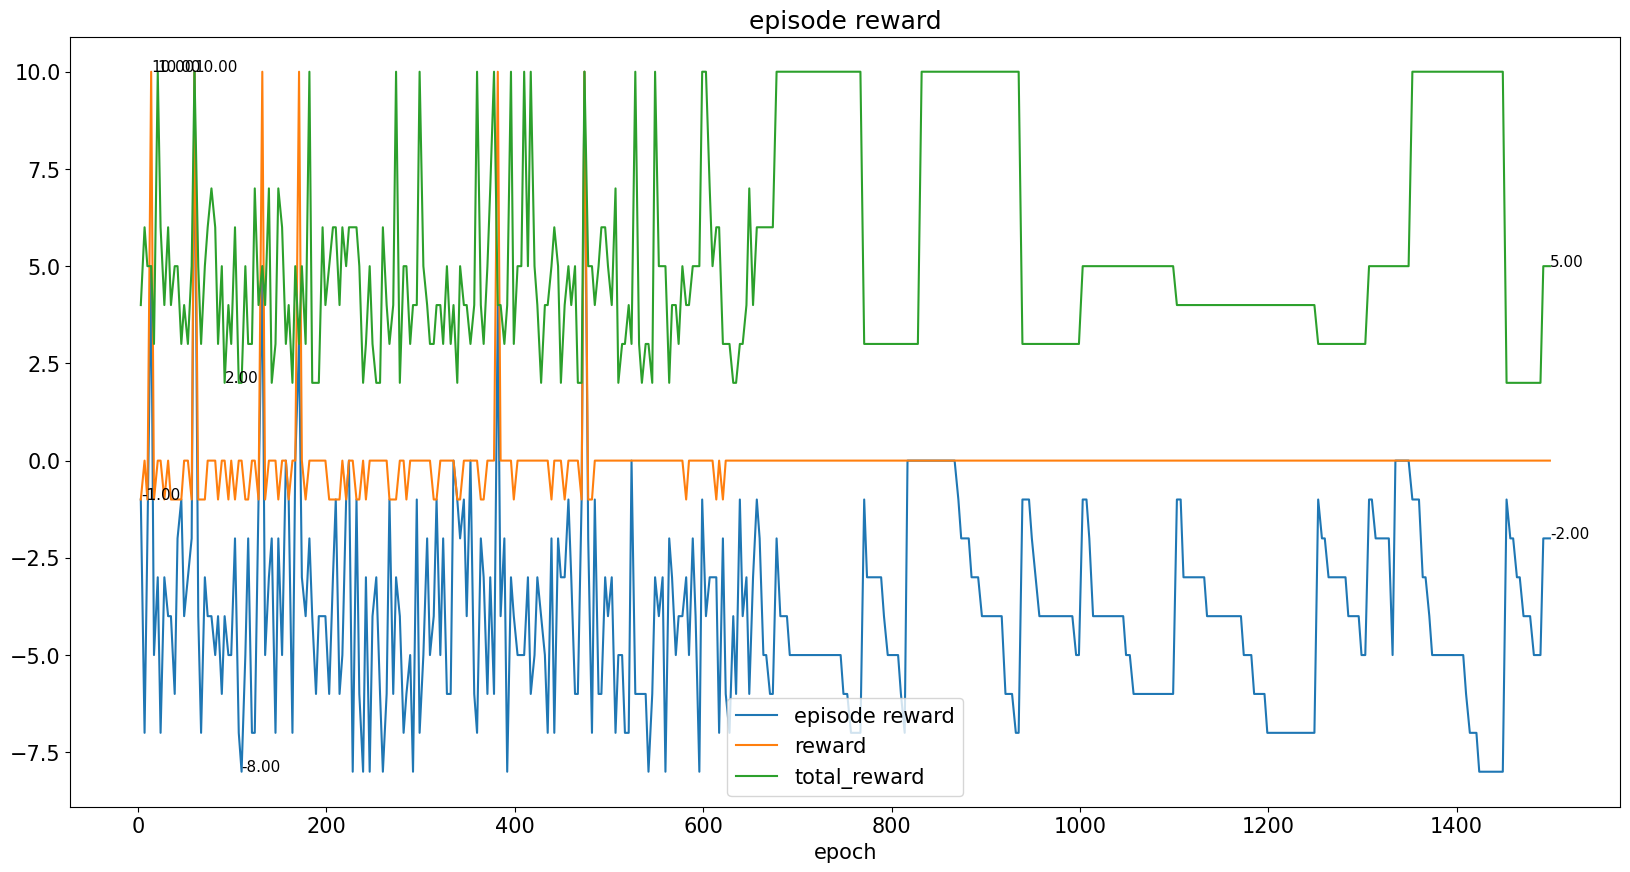

In [698]:
display(metrics, 'reward', 'episode reward')

In [699]:
# display(metrics, 'aon', 'All or Nothing')

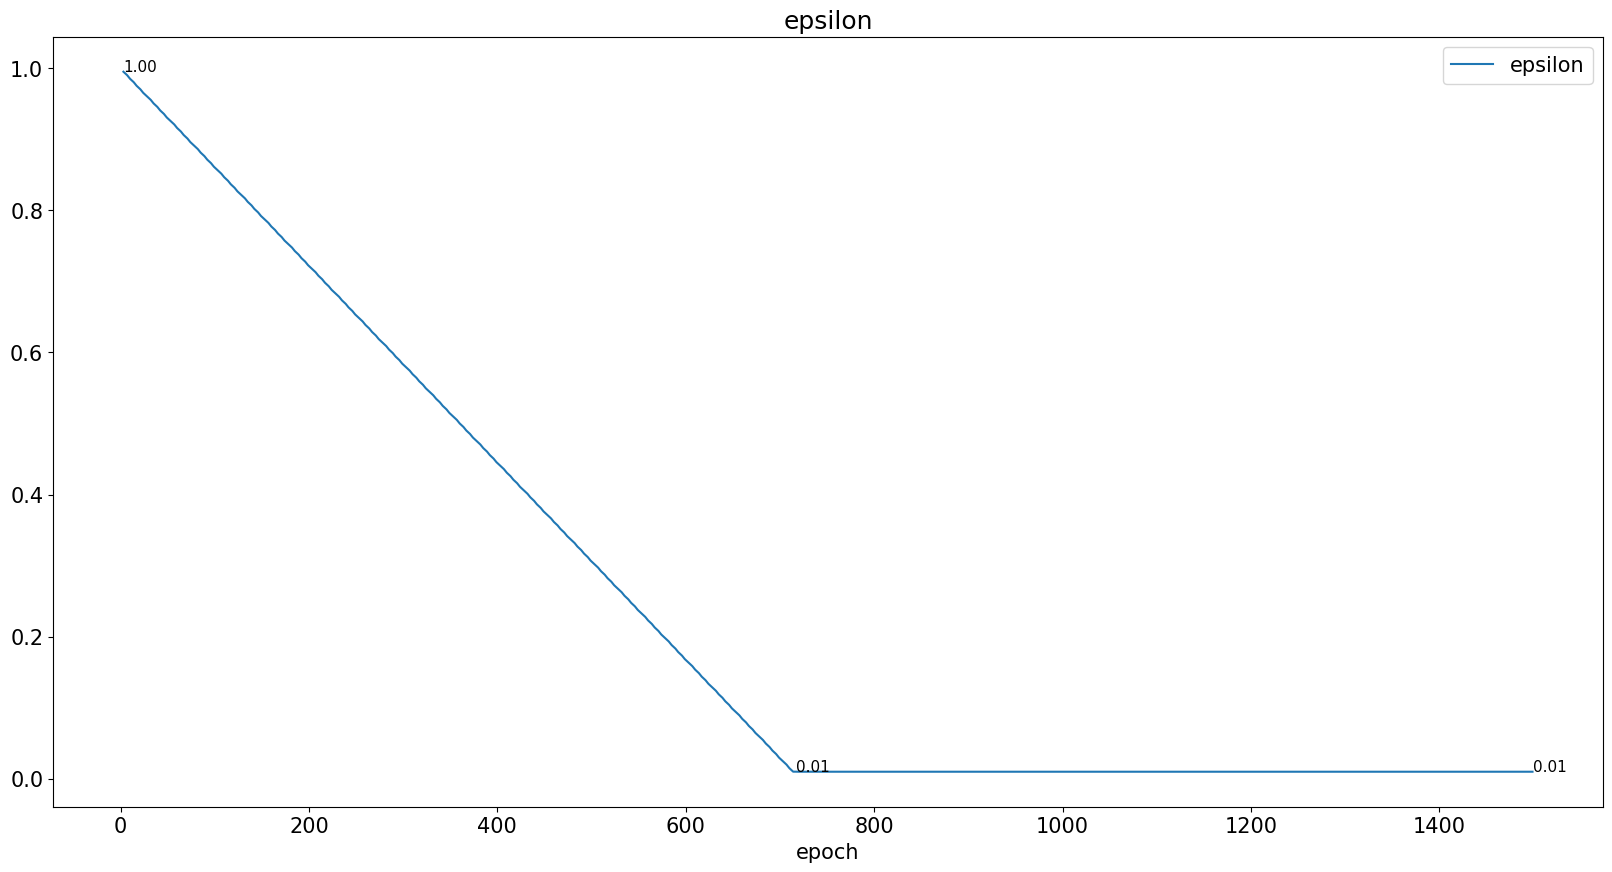

In [700]:
display(metrics, 'epsilon', 'epsilon')

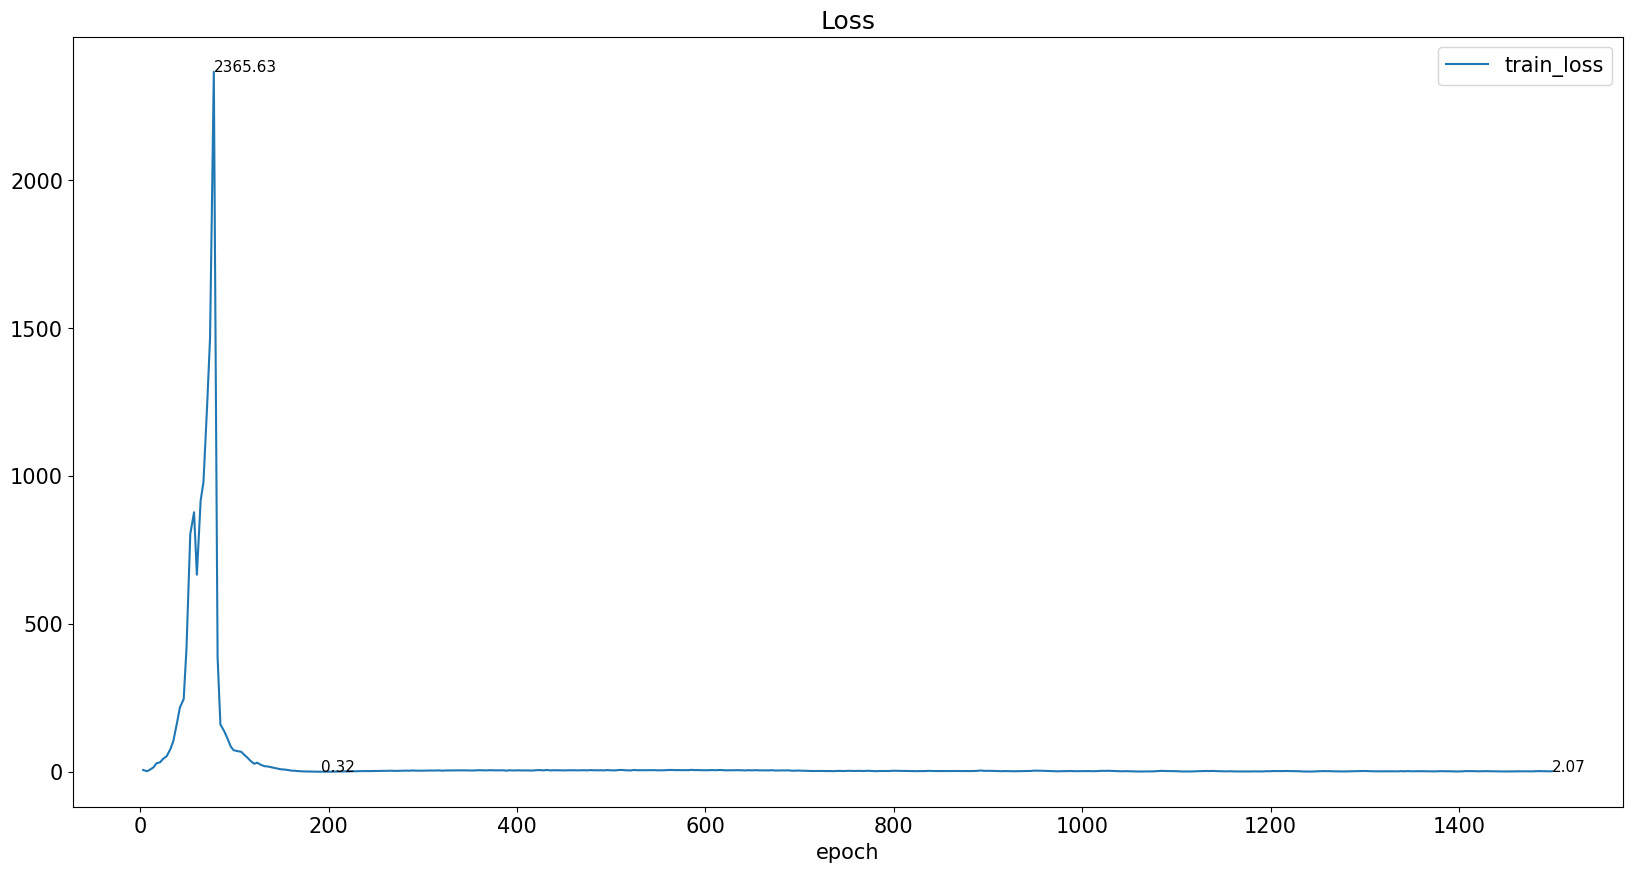

In [703]:
display(metrics, 'loss', 'Loss')

In [702]:
display(metrics, 'val', 'Normalized Validation Metrics', normalize=True)

TypeError: no numeric data to plot

In [ ]:
display(metrics, 'train', 'Normalized Train Metrics', normalize=True)

In [ ]:
for ax in axes:
    plt.close(ax.get_figure())